# Importing libraries

In [247]:
import torch
import torchvision
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import requests
import shutil
from torchsummary import summary
import numpy as np
from pycocotools.coco import COCO
from warnings import filterwarnings
filterwarnings("ignore")
print(torch.__version__)
print(torch.cuda.is_available())

1.8.2
False


# Downloading the inference image

In [50]:
# Get URL of inference image
url = "https://media-cldnry.s-nbcnews.com/image/upload/t_fit-1240w,f_auto,q_auto:best/newscms/2019_48/2136561/170829-better-personality-work-overhead-view-se-1210p.jpg"

file_name = "inference_img.jpg"
response = requests.get(url,stream=True)
print(response)

if response.status_code == 200:
    with open(file_name,"wb") as file:
        shutil.copyfileobj(response.raw,file)
    print("Image successfully downloaded!!")
else:
    print("Image could not be downloaded!!")
    

<Response [200]>
Image successfully downloaded!!


# Displaying the image

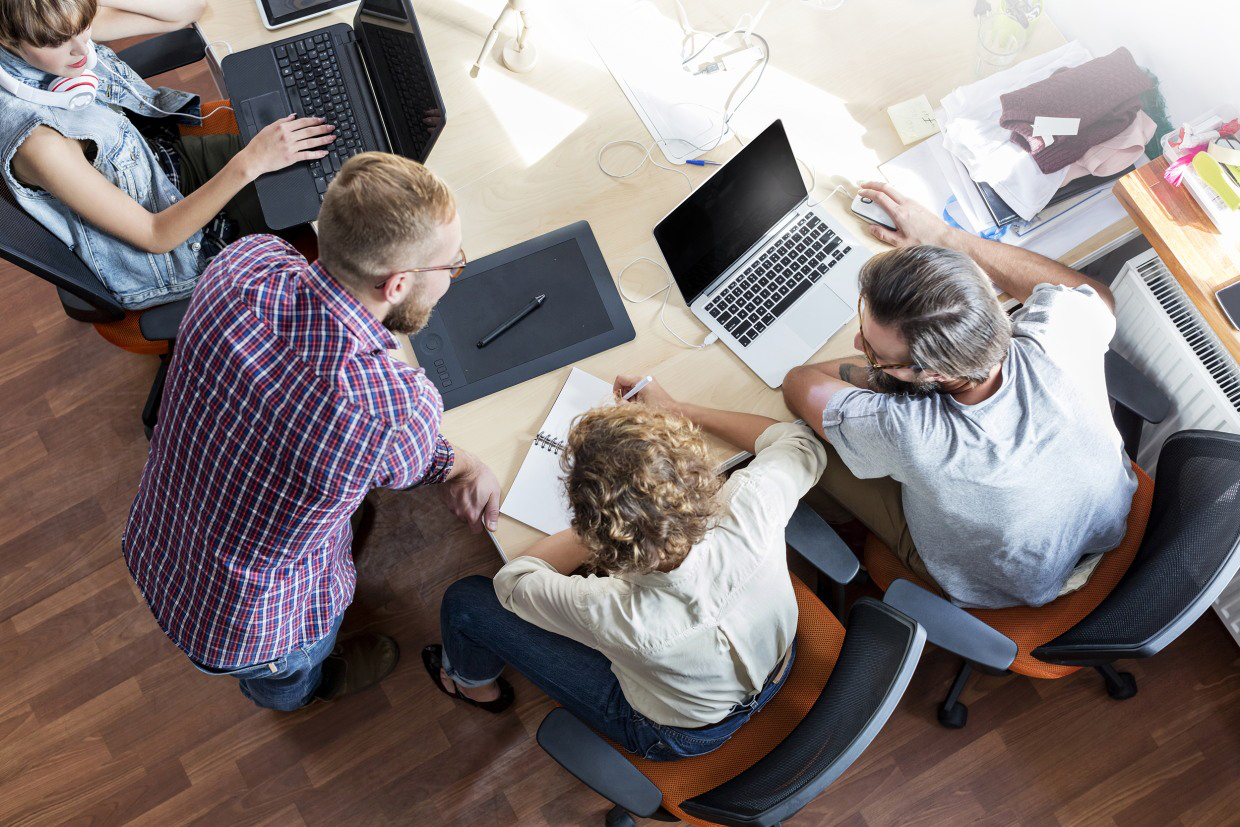

In [51]:
image = Image.open(file_name)
image

# Get labels

In [192]:
with open("coco_labels.txt","r") as file:
    labels = {key:value[:-1] for key,value in zip(range(1,91),file.readlines())}
    labels_list = [label for label in labels.values()]
    file.close()

In [193]:
labels

{1: 'person',
 2: 'bicycle',
 3: 'car',
 4: 'motorcycle',
 5: 'airplane',
 6: 'bus',
 7: 'train',
 8: 'truck',
 9: 'boat',
 10: 'traffic light',
 11: 'fire hydrant',
 12: 'street sign',
 13: 'stop sign',
 14: 'parking meter',
 15: 'bench',
 16: 'bird',
 17: 'cat',
 18: 'dog',
 19: 'horse',
 20: 'sheep',
 21: 'cow',
 22: 'elephant',
 23: 'bear',
 24: 'zebra',
 25: 'giraffe',
 26: 'hat',
 27: 'backpack',
 28: 'umbrella',
 29: 'shoe',
 30: 'eye glasses',
 31: 'handbag',
 32: 'tie',
 33: 'suitcase',
 34: 'frisbee',
 35: 'skis',
 36: 'snowboard',
 37: 'sports ball',
 38: 'kite',
 39: 'baseball bat',
 40: 'baseball glove',
 41: 'skateboard',
 42: 'surfboard',
 43: 'tennis racket',
 44: 'bottle',
 45: 'plate',
 46: 'wine glass',
 47: 'cup',
 48: 'fork',
 49: 'knife',
 50: 'spoon',
 51: 'bowl',
 52: 'banana',
 53: 'apple',
 54: 'sandwich',
 55: 'orange',
 56: 'broccoli',
 57: 'carrot',
 58: 'hot dog',
 59: 'pizza',
 60: 'donut',
 61: 'cake',
 62: 'chair',
 63: 'couch',
 64: 'potted plant',
 65

In [194]:
labels_list[:10]

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light']

# Loading the pre-trained RetinaNet model

In [47]:
# We'll use COCO weights with Resnet50 Backbone.
model = torchvision.models.detection.retinanet_resnet50_fpn(pretrained=True)

# Converting image to torch.tensor

In [52]:
transform = T.ToTensor()
image_tensor = transform(image)

In [53]:
image_tensor.shape

torch.Size([3, 827, 1240])

In [54]:
# Convert the image to 4-D image (model wants to 4 dimensional)
image_tensor_expanded = image_tensor.unsqueeze(0)
image_tensor_expanded.shape

torch.Size([1, 3, 827, 1240])

In [55]:
# To find the boundary boxes , need to integer values of image pixels
image_int = torch.tensor(image_tensor*255,dtype = torch.uint8)
image_int

tensor([[[ 51,  60,  68,  ..., 252, 252, 252],
         [ 38,  50,  66,  ..., 252, 252, 252],
         [ 31,  40,  65,  ..., 252, 252, 252],
         ...,
         [106, 108, 109,  ...,  81,  80,  79],
         [101, 101, 105,  ...,  79,  79,  78],
         [111, 109, 111,  ...,  78,  78,  77]],

        [[ 44,  53,  61,  ..., 252, 252, 252],
         [ 31,  43,  59,  ..., 252, 252, 252],
         [ 24,  33,  58,  ..., 252, 252, 252],
         ...,
         [ 74,  76,  77,  ...,  52,  53,  52],
         [ 69,  69,  73,  ...,  51,  51,  51],
         [ 76,  74,  76,  ...,  50,  50,  49]],

        [[ 34,  43,  53,  ..., 252, 252, 252],
         [ 21,  33,  51,  ..., 252, 252, 252],
         [ 14,  23,  50,  ..., 252, 252, 252],
         ...,
         [ 53,  55,  56,  ...,  36,  36,  35],
         [ 48,  48,  52,  ...,  37,  37,  34],
         [ 56,  54,  56,  ...,  36,  36,  35]]], dtype=torch.uint8)

# Inference mode

In [59]:
# Setting inference mode
model.eval()

# Setting non-computation gradient mode
with torch.no_grad():
    output = model(image_tensor_expanded)
    results = output[0]
    print(results)

{'boxes': tensor([[ 652.9221,  121.5444,  930.7643,  389.4743],
        [ 444.5255,  387.7397,  828.7524,  755.6072],
        [ 123.2871,  145.1405,  515.4386,  708.5283],
        ...,
        [1190.4939,  154.9630, 1238.2635,  215.2363],
        [1177.8892,  109.1223, 1222.6448,  142.5865],
        [ 653.6247,  301.6648,  710.0735,  347.5511]]), 'scores': tensor([0.8813, 0.8503, 0.8339, 0.6685, 0.6546, 0.6356, 0.6121, 0.5522, 0.5498,
        0.5161, 0.5006, 0.4151, 0.4040, 0.3955, 0.3924, 0.3830, 0.3752, 0.3666,
        0.3210, 0.3178, 0.3026, 0.2989, 0.2787, 0.2787, 0.2729, 0.2678, 0.2678,
        0.2641, 0.2583, 0.2546, 0.2537, 0.2481, 0.2423, 0.2407, 0.2388, 0.2382,
        0.2367, 0.2317, 0.2301, 0.2292, 0.2291, 0.2276, 0.2263, 0.2237, 0.2229,
        0.2158, 0.2096, 0.2048, 0.2033, 0.2013, 0.2002, 0.1994, 0.1989, 0.1975,
        0.1961, 0.1924, 0.1918, 0.1880, 0.1852, 0.1851, 0.1851, 0.1845, 0.1831,
        0.1828, 0.1806, 0.1801, 0.1782, 0.1781, 0.1770, 0.1758, 0.1756, 0.1753,
 

In [255]:
print(results["boxes"])
print("{} boxes detected.".format(len(results["boxes"])))

tensor([[ 652.9221,  121.5444,  930.7643,  389.4743],
        [ 444.5255,  387.7397,  828.7524,  755.6072],
        [ 123.2871,  145.1405,  515.4386,  708.5283],
        ...,
        [1190.4939,  154.9630, 1238.2635,  215.2363],
        [1177.8892,  109.1223, 1222.6448,  142.5865],
        [ 653.6247,  301.6648,  710.0735,  347.5511]])
251 boxes detected.


In [195]:
results['labels']

tensor([73,  1,  1,  1,  1, 73, 62, 62, 76, 62, 74, 62, 73, 77, 62, 62,  1,  1,
         1,  1, 84, 73,  1,  1,  1, 15, 62, 62, 76, 62, 67, 31, 62, 15, 76, 75,
        75,  1,  1, 76, 73, 49, 15, 62,  1, 62, 81, 31, 15, 62, 76, 84, 62, 27,
         1, 67, 84, 76, 15, 62, 67, 73, 67, 62, 73, 62, 77, 65,  1, 67,  1, 63,
         1, 67, 62, 15, 31, 67, 62, 77, 62, 15, 67, 65, 62, 67, 15, 62, 76, 67,
        72, 31,  1, 67, 63, 67, 62, 67, 76, 84, 73, 62, 49, 63, 49, 62, 76, 62,
        67, 33, 62, 15, 65, 63, 76, 67, 63, 63, 84, 62, 27, 75, 67, 33, 62, 15,
        84, 79, 67, 62, 67, 84, 62, 15, 62,  1, 27, 81, 62, 49,  1, 65,  2, 77,
         1, 65, 76, 62, 62, 65,  1, 31, 67, 84, 65, 47, 15, 50, 73, 15, 63, 49,
        27, 84, 84, 50, 75,  1, 44, 27, 63, 73, 63, 49, 49, 90, 65, 62, 33, 18,
        65, 77, 88, 31, 67, 84, 62, 31, 62, 67, 62, 41, 32, 67,  9,  2, 77, 15,
        65, 88, 76, 49, 63, 87, 75, 74, 15, 67, 47, 62, 75, 65, 73, 72, 44,  1,
        84, 62, 75, 65, 76, 73, 49, 62, 

# Converting torch.tensors to lists

In [211]:
results_labels_list = results['labels'][results['scores']>min_score]
results_labels_list = [i.item() for i in results_labels_list]
results_labels_list

[73, 1, 1, 1, 1, 73, 62]

In [223]:
results_scores_list = results['scores'][results['scores']>min_score]
results_scores_list = [float("{:.2f}".format(i.item())) for i in results_scores_list]
results_scores_list

[0.88, 0.85, 0.83, 0.67, 0.65, 0.64, 0.61]

# Drawing prediction boundary boxes

In [260]:
from torchvision.utils import draw_bounding_boxes

min_score = 0.6

pred_img = draw_bounding_boxes(image_int,results['boxes'][results['scores']>min_score],
    width=3,
    labels=[str(labels[i])+str(":")+str(results_scores_list[j]) for i,j in zip(results_labels_list,range(len(results_labels_list)))],
    font_size=35)

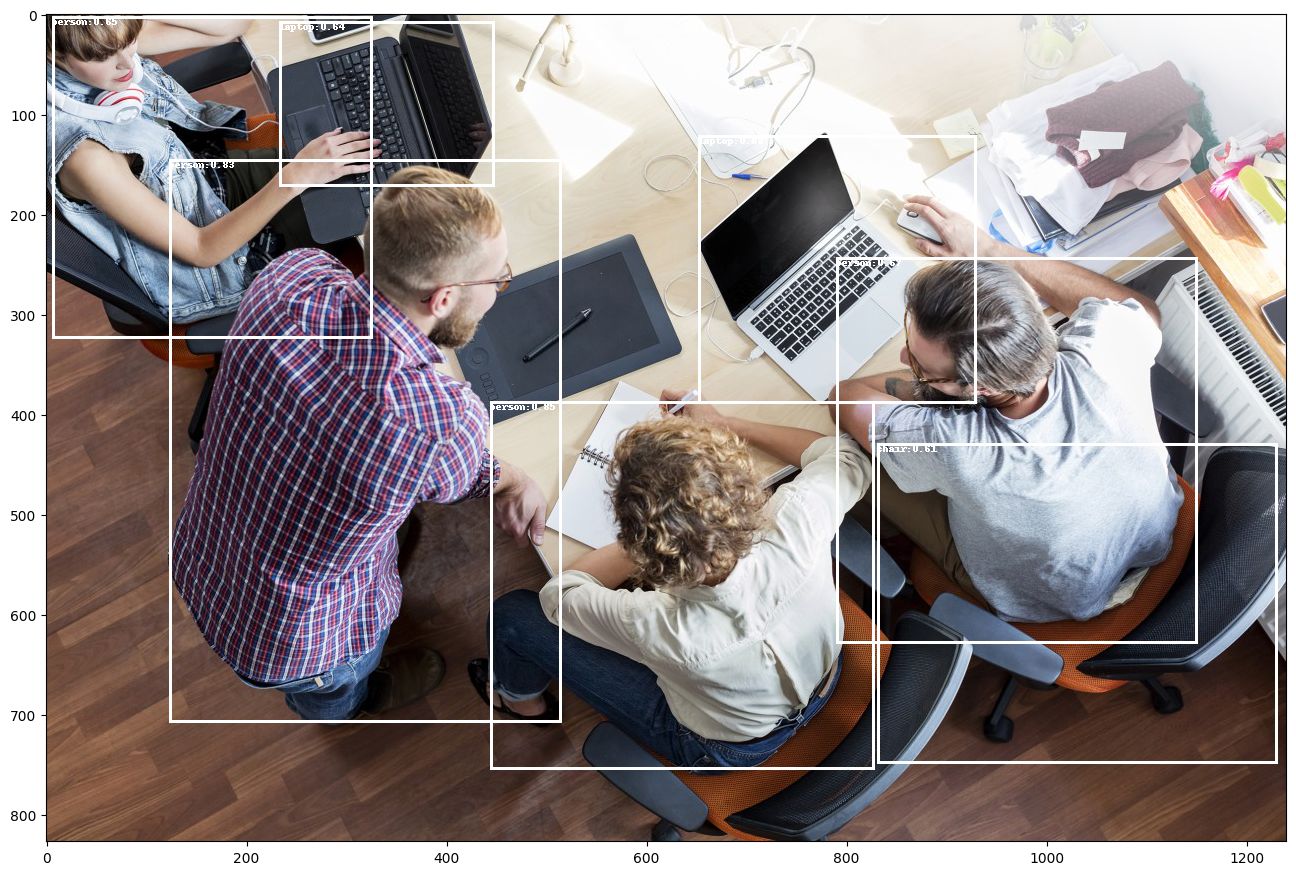

In [261]:
plt.figure(figsize=(16,16))
plt.imshow(pred_img.permute(1,2,0))